In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
us_dollar = pd.read_csv('/content/drive/MyDrive/Data Magic Uploads/Data/CCUSSP01IFM650N.csv')
us_dollar.dropna(inplace=True)

In [ ]:
us_dollar.head()

,DATE,CCUSSP01IFM650N
0,1975-01-01,1.238896
1,1975-02-01,1.260382
2,1975-03-01,1.247474
3,1975-04-01,1.241434
4,1975-05-01,1.246821


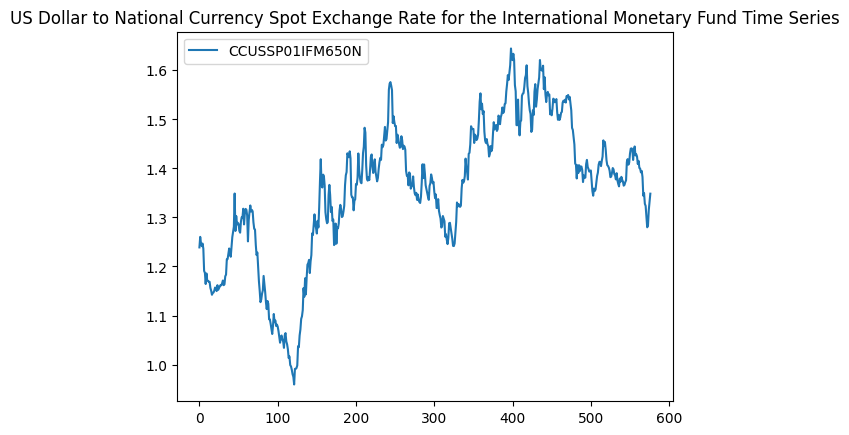

In [ ]:
us_dollar.plot()
plt.title('US Dollar to National Currency Spot Exchange Rate for the International Monetary Fund Time Series')
plt.show()

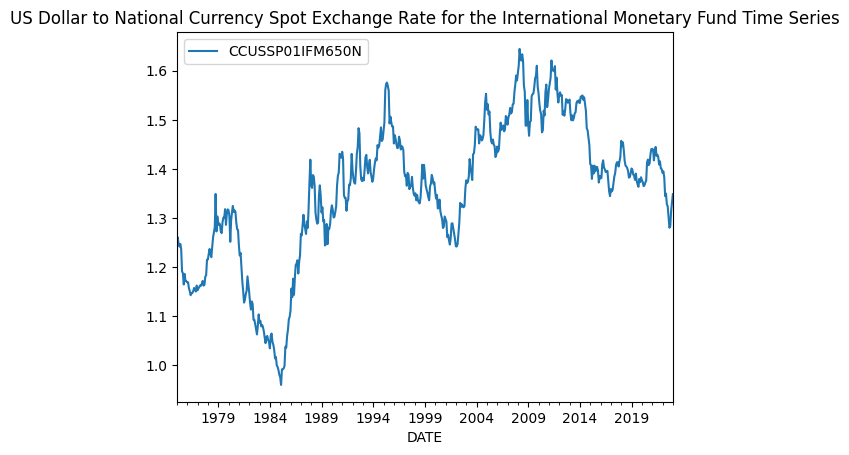

In [ ]:
us_dollar.index = pd.to_datetime(us_dollar.DATE)
us_dollar.plot()
plt.title('US Dollar to National Currency Spot Exchange Rate for the International Monetary Fund Time Series')
plt.show()

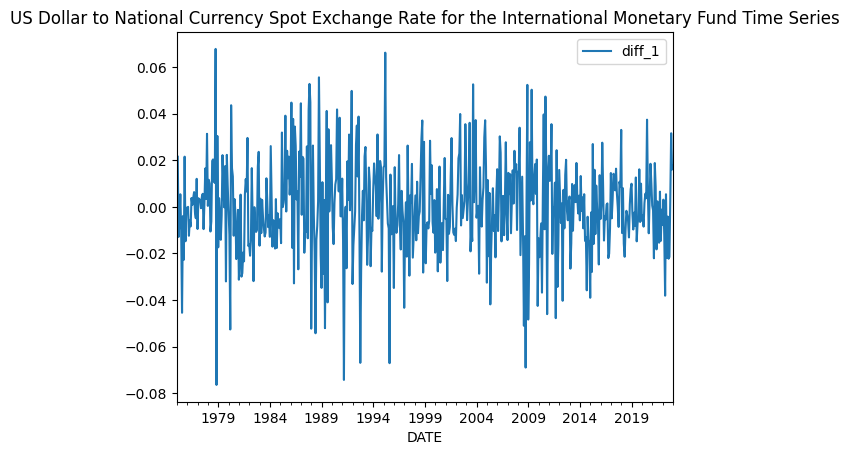

In [ ]:
us_dollar['diff_1'] = us_dollar.CCUSSP01IFM650N - us_dollar.CCUSSP01IFM650N.shift()
us_dollar.plot(y='diff_1')
plt.title('US Dollar to National Currency Spot Exchange Rate for the International Monetary Fund Time Series')
plt.show()

Text(0.5, 1.0, 'US Dollar  PACF')

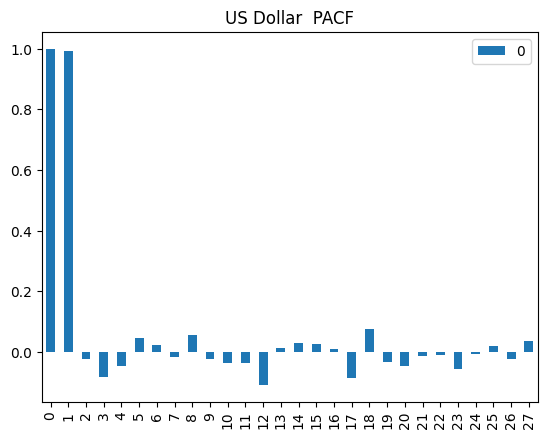

In [ ]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(us_dollar.CCUSSP01IFM650N))
x_acf.plot(kind='bar')
plt.title("US Dollar  PACF")

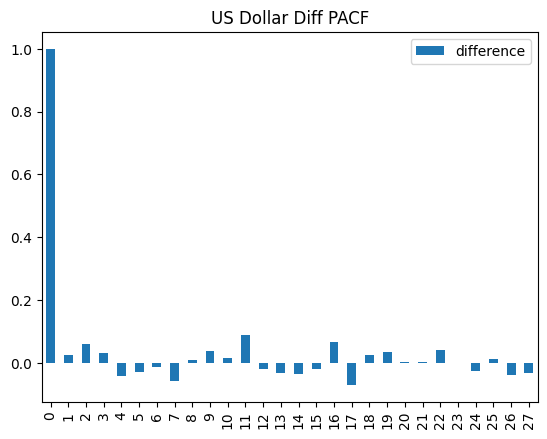

In [ ]:
x_acf = pd.DataFrame(pacf(us_dollar.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("US Dollar Diff PACF")
plt.legend(['difference'])

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(us_dollar.CCUSSP01IFM650N, order=(1,1,2))
result = model.fit()
print(result.summary())
print('Residuals Description')
print(result.resid.describe())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        CCUSSP01IFM650N   No. Observations:                  577
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1431.124
Date:                Mon, 03 Apr 2023   AIC                          -2854.248
Time:                        04:59:33   BIC                          -2836.824
Sample:                    01-01-1975   HQIC                         -2847.453
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2603      0.562      0.463      0.643      -0.841       1.361
ma.L1         -0.2397      0.561     -0.427      0.669      -1.340       0.860
ma.L2          0.0585      0.042      1.389      0.1

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(us_dollar.CCUSSP01IFM650N, order=(1,0,0))
result = model.fit()
print(result.summary())
print('Residuals Description')
print(result.resid.describe())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        CCUSSP01IFM650N   No. Observations:                  577
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1431.989
Date:                Mon, 03 Apr 2023   AIC                          -2857.978
Time:                        05:00:43   BIC                          -2844.904
Sample:                    01-01-1975   HQIC                         -2852.880
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3566      0.074     18.338      0.000       1.212       1.502
ar.L1          0.9896      0.006    158.027      0.000       0.977       1.002
sigma2         0.0004   1.93e-05     21.079      0.0

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(us_dollar.CCUSSP01IFM650N, order=(1,0,1))
result = model.fit()
print(result.summary())
print('Residuals Description')
print(result.resid.describe())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        CCUSSP01IFM650N   No. Observations:                  577
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1432.200
Date:                Mon, 03 Apr 2023   AIC                          -2856.399
Time:                        05:01:53   BIC                          -2838.968
Sample:                    01-01-1975   HQIC                         -2849.602
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3566      0.074     18.387      0.000       1.212       1.501
ar.L1          0.9891      0.006    152.594      0.000       0.976       1.002
ma.L1          0.0288      0.037      0.782      0.4

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(us_dollar.CCUSSP01IFM650N, order=(5,1,5))
result = model.fit()
print(result.summary())
print('Residuals Description')
print(result.resid.describe())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

                               SARIMAX Results                                
Dep. Variable:        CCUSSP01IFM650N   No. Observations:                  577
Model:                 ARIMA(5, 1, 5)   Log Likelihood                1433.612
Date:                Mon, 03 Apr 2023   AIC                          -2845.224
Time:                        05:02:56   BIC                          -2797.307
Sample:                    01-01-1975   HQIC                         -2826.537
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0684      3.492     -0.020      0.984      -6.912       6.775
ar.L2          0.2509      2.081      0.121      0.904      -3.828       4.330
ar.L3          0.2047      0.594      0.344      0.7

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'Histogram of Residuals')

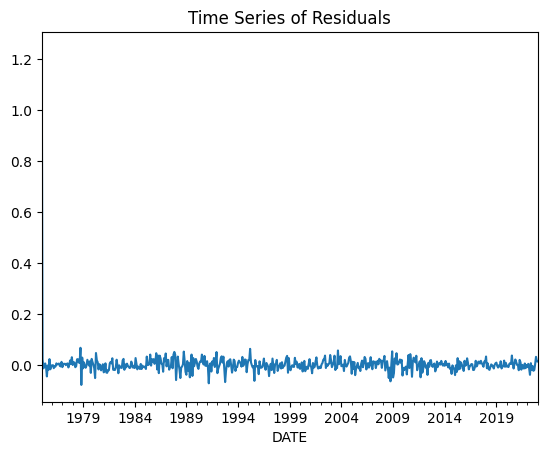

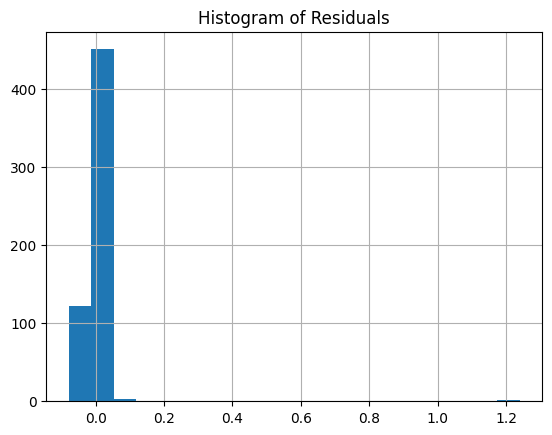

In [ ]:
residuals = pd.DataFrame(result.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')